In [1]:
from __future__ import print_function
import numpy as np
import mdtraj as md
import pandas as pd
import h5py
from matplotlib.pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

## Simulated annealing saturated lipids - dev_v14

In [2]:
def calc_Tm(T_quench,T_heat):
    T_quench_mean = np.mean(T_quench)
    T_quench_std = np.std(T_quench,ddof=1) #Bessel's correction
    
    T_heat_mean = np.mean(T_heat)
    T_heat_std = np.std(T_heat,ddof=1) #Bessel's correction
    
    Tm = T_quench_mean + T_heat_mean - np.sqrt(T_quench_mean*T_heat_mean) 
    
    d_dT_quench = 1 - T_heat_mean/(2*np.sqrt(T_quench_mean*T_heat_mean))
    d_dT_heat = 1 - T_quench_mean/(2*np.sqrt(T_quench_mean*T_heat_mean))
    
    Tm_err = np.sqrt(np.power(d_dT_quench,2)*np.power(T_quench_std,2)+np.power(d_dT_heat,2)*np.power(T_heat_std,2)) #Standard error propegation
    
    return T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err

In [3]:
exp_Tm_dlpc = 271.15
exp_Tm_dmpc = 297.15
exp_Tm_dppc = 314.15
exp_Tm_dspc = 328.15
exp_Tm_dkpc = 339.15
exp_Tm_dbpc = 348.15

In [4]:
T_quench = np.flip(np.arange(273,373,1))
T_heat = np.arange(274,374,1)

In [6]:
mol = "dspc"
exp_Tm = 314.15
n_rep = 1

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("/data2/lisbeth_is_awesome/STEROLS/TMs/index_test/temp_TEST.lammpstrj")
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

ValueError: could not convert string 'ITEM:' to float64 at row 0, column 1.

In [56]:
### Begin Test DPPC 10 repetitions ### 

In [57]:
mol = "dppc"
exp_Tm = 314.15
n_rep = 10

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("../../../sterols/test_lindemann/index_test/dppc/10x10/data_r{}.dat".format(i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[287.0, 287.0, 287.0, 288.0, 288.0, 286.0, 290.0, 286.0, 288.0, 287.0] [324.0, 326.0, 335.0, 326.0, 334.0, 339.0, 328.0, 335.0, 327.0, 328.0]
309.5424079818839 2.7607567650501275
287.4 1.1737877907772674
330.2 5.072803301265813


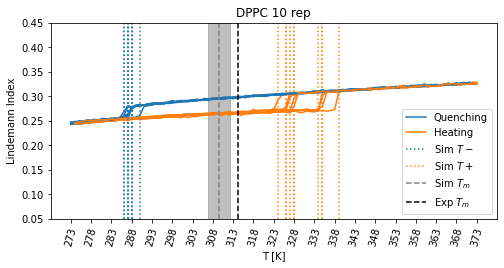

In [58]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DPPC 10 rep")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dppc_dev14.png",dpi=300)
plt.show()

In [59]:
print(Tm, Tm_err)

309.5424079818839 2.7607567650501275


In [60]:
### End Test DPPC 10 repetitions ###

In [61]:
### Begin Test CHOL 10 repetitions ###

In [62]:
mol = "dppc"
exp_Tm = 314.15
n_rep = 10

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("../../../sterols/test_lindemann/index_test/chol/10x10/data_r{}.dat".format(i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[292.0, 292.0, 292.0, 291.0, 292.0, 295.0, 291.0, 294.0, 293.0, 294.0] [328.0, 318.0, 331.0, 312.0, 329.0, 320.0, 322.0, 323.0, 325.0, 320.0]
308.0707303233225 3.0605344596898902
292.6 1.3498971154211057
322.8 5.7115866641610396


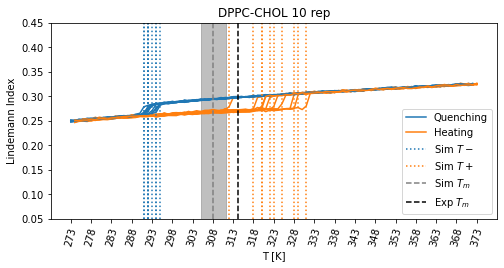

In [63]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DPPC-CHOL 10 rep")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dppc_dev14.png",dpi=300)
plt.show()

In [64]:
print(Tm, Tm_err)

308.0707303233225 3.0605344596898902


In [65]:
### End Test CHOL 10 repetitions ###

In [66]:
### Begin Test CHOL 1 repetitions hexagonal ###

In [67]:
mol = "dppc"
exp_Tm = 314.15
n_rep = 1

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("../../../sterols/test_lindemann/index_test/chol/hexagonal/10x10/data_r{}.dat".format(i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[294.0] [319.0]
306.755000040817 nan
294.0 nan
319.0 nan


/home/rpestana/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/rpestana/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


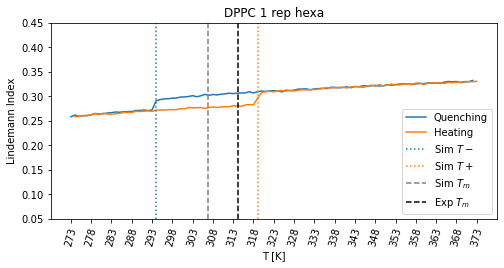

In [68]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DPPC 1 rep hexa")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dppc_dev14.png",dpi=300)
plt.show()

In [69]:
print(Tm, Tm_err)

306.755000040817 nan


In [ ]:
### End Test CHOL 1 repetitions hexagonal ###

In [ ]:
### Begin actual protocol ###

In [ ]:
T_quench = np.flip(np.arange(273,373,1))
T_heat = np.arange(274,374,1)
T_quench

100

In [ ]:
T_heat

array([274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373])

In [ ]:
mol = "dmpc"
exp_Tm = 297.15
n_rep = 10

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("{}/dev14_anneal/data/lindemann_r{}.dat".format(mol,i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[276.0, 276.0, 273.0, 279.0, 277.0, 278.0, 278.0, 278.0, 275.0, 276.0] [299.0, 301.0, 307.0, 319.0, 298.0, 297.0, 297.0, 299.0, 309.0, 298.0]
289.78755213511295 3.835067188801334
276.6 1.776388345929897
302.4 7.167829363048326


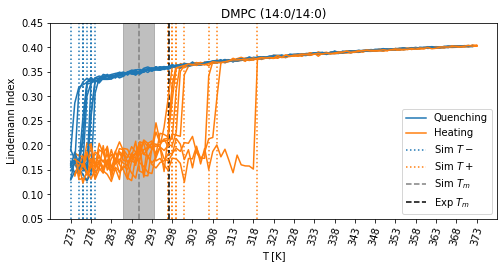

In [6]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DMPC (14:0/14:0)")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dmpc_dev14.png",dpi=300)
plt.show()

In [5]:
mol = "dppc"
exp_Tm = 314.15
n_rep = 10

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("{}/dev14_anneal/data/lindemann_r{}.dat".format(mol,i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[300.0, 300.0, 299.0, 300.0, 300.0, 302.0, 300.0, 301.0, 298.0, 299.0] [324.0, 325.0, 324.0, 329.0, 325.0, 318.0, 320.0, 321.0, 335.0, 326.0]
312.5462706519917 2.5531031082319253
299.9 1.1005049346146119
324.7 4.808557187163549


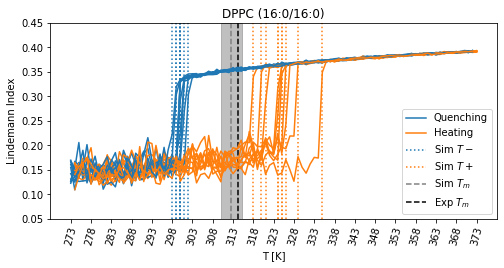

In [6]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DPPC (16:0/16:0)")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dppc_dev14.png",dpi=300)
plt.show()

In [7]:
mol = "dppc"
exp_Tm = 314.15
n_rep = 10

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("{}/dev14_anneal_salt/data/lindemann_r{}.dat".format(mol,i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[302.0, 299.0, 301.0, 302.0, 303.0, 301.0, 302.0, 302.0, 300.0, 302.0] [331.0, 325.0, 320.0, 324.0, 323.0, 333.0, 325.0, 320.0, 325.0, 332.0]
313.83739853007353 2.4967196626523465
301.4 1.1737877907772674
325.8 4.685675570881488


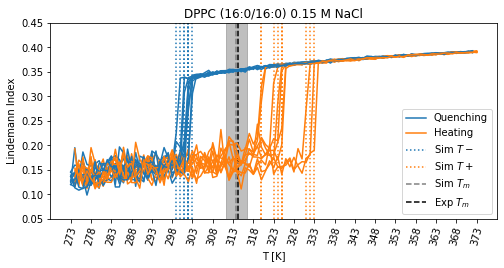

In [8]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DPPC (16:0/16:0) 0.15 M NaCl")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dppc_salt_dev14.png",dpi=300)
plt.show()

In [9]:
mol = "dspc"
exp_Tm = 328.15
n_rep = 10

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("{}/dev14_anneal/data/lindemann_r{}.dat".format(mol,i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[314.0, 313.0, 313.0, 314.0, 314.0, 314.0, 317.0, 314.0, 315.0, 314.0] [337.0, 347.0, 339.0, 338.0, 354.0, 341.0, 349.0, 352.0, 344.0, 356.0]
330.3261236080748 3.6660826140545826
314.2 1.1352924243950935
345.7 6.9290050592499295


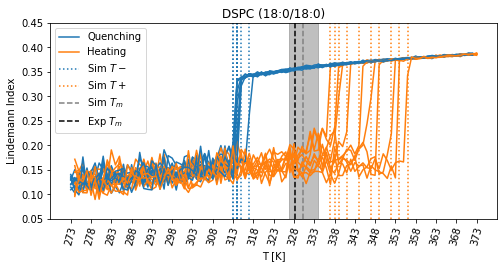

In [10]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DSPC (18:0/18:0)")
plt.legend(loc="upper left")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dspc_dev14.png",dpi=300)
plt.show()

In [11]:
mol = "dkpc"
exp_Tm = 339.15
n_rep = 10

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("{}/dev14_anneal/data/lindemann_r{}.dat".format(mol,i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[329.0, 327.0, 326.0, 327.0, 329.0, 328.0, 327.0, 328.0, 328.0, 328.0] [355.0, 362.0, 356.0, 354.0, 350.0, 357.0, 362.0, 356.0, 355.0, 362.0]
342.6115060415043 2.124587501220502
327.7 0.9486832980505138
356.9 3.984692933938295


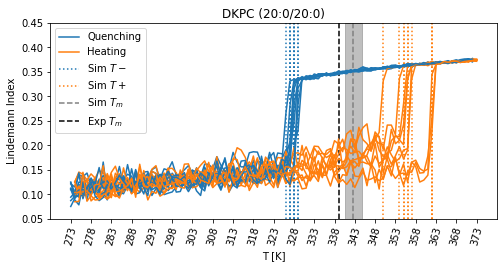

In [12]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DKPC (20:0/20:0)")
plt.legend(loc="upper left")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dkpc_dev14.png",dpi=300)
plt.show()

## Simulated annealing saturated lipids - M3

In [13]:
mol = "dlpc"
n_rep = 10

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("{}/m3_anneal/data/lindemann_r{}.dat".format(mol,i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[274.0, 274.0, 273.0, 273.0, 273.0, 275.0, 276.0, 273.0, 273.0, 273.0] [274.0, 276.0, 287.0, 291.0, 279.0, 291.0, 295.0, 288.0, 282.0, 289.0]
279.50916264129205 3.6351071949120533
273.7 1.0593499054713804
285.2 7.052186422190875


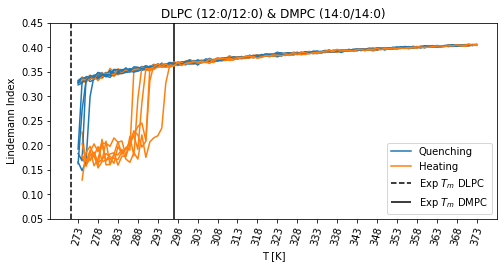

In [14]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        #ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        #ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        #ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        #ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
#ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
#ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm_dlpc,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$ DLPC')
ax.vlines(exp_Tm_dmpc,0,0.45,ls="solid",colors='k',label=r'Exp $T_m$ DMPC')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DLPC (12:0/12:0) & DMPC (14:0/14:0)")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dlpc_m3v300.png",dpi=300)
plt.show()

In [15]:
mol = "dppc"
n_rep = 10

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("{}/m3_anneal/data/lindemann_r{}.dat".format(mol,i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[289.0, 291.0, 292.0, 289.0, 291.0, 291.0, 289.0, 291.0, 289.0, 292.0] [327.0, 330.0, 320.0, 328.0, 341.0, 343.0, 327.0, 323.0, 323.0, 324.0]
310.0899159949614 4.096059257673046
290.4 1.2649110640673518
328.6 7.647802879839992


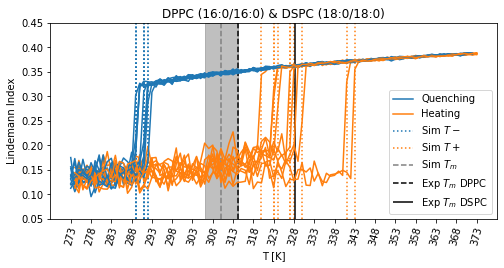

In [16]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm_dppc,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$ DPPC')
ax.vlines(exp_Tm_dspc,0,0.45,ls="solid",colors='k',label=r'Exp $T_m$ DSPC')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DPPC (16:0/16:0) & DSPC (18:0/18:0)")
plt.legend(loc="lower right")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dppc_m3v300.png",dpi=300)
plt.show()

In [17]:
mol = "dbpc"
n_rep = 10

quench_list = []
heat_list = []
Tquench_list = []
Theat_list = []

for i in np.arange(1,n_rep+1,1):
    data = np.loadtxt("{}/m3_anneal/data/lindemann_r{}.dat".format(mol,i))
    quench = np.stack((T_quench,data[0:100]))
    quench_list.append(quench)
    heat = np.stack((T_heat,data[100:]))
    heat_list.append(heat)
    
    Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
    Tquench_list.append(Tquench)
    
    Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
    Theat_list.append(Theat)

print(Tquench_list,Theat_list)
T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
print(Tm,Tm_err)
print(T_quench_mean,T_quench_std)
print(T_heat_mean,T_heat_std)

[302.0, 301.0, 303.0, 301.0, 302.0, 301.0, 300.0, 305.0, 304.0, 302.0] [334.0, 348.0, 332.0, 344.0, 348.0, 352.0, 347.0, 333.0, 357.0, 348.0]
323.8894885433965 4.587671515067879
302.1 1.5238839267549948
344.3 8.525126261691247


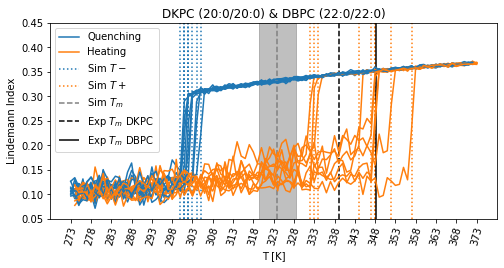

In [18]:
f, ax = plt.subplots(figsize=(8,4))
for i in range(n_rep):
    if not i:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
    else:
        ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
        ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
        ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
        ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')
        
ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
ax.vlines(exp_Tm_dkpc,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$ DKPC')
ax.vlines(exp_Tm_dbpc,0,0.45,ls="solid",colors='k',label=r'Exp $T_m$ DBPC')

plt.xticks(rotation = 75)
ax.set_xticks(np.arange(273,374,5))
ax.set_yticks(np.arange(0.05,0.50,0.05))
ax.set_ylim(0.05,0.45)

plt.xlabel("T [K]")
plt.ylabel("Lindemann Index")

plt.title("DKPC (20:0/20:0) & DBPC (22:0/22:0)")
plt.legend(loc="upper left")
plt.subplots_adjust(bottom=0.2)
plt.savefig("Lindemann_dbpc_m3v300.png",dpi=300)
plt.show()

## P2 Order parameters

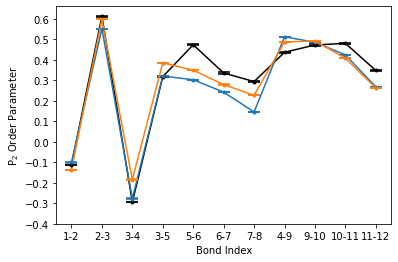

In [69]:
p2_c36_popc = np.loadtxt("popc/p2.dat")
p2_dev14_popc = np.loadtxt("popc/dev14/data/r1/p1/p2.dat")
p2_m3_popc = np.loadtxt("popc/m3/data/r1/p1/p2.dat")
bonds = ['1-2', '2-3', '3-4', '3-5', '5-6', '6-7', '7-8', '4-9', '9-10', '10-11', '11-12']

f, ax = plt.subplots()
markers, caps, bars = ax.errorbar(bonds,p2_c36_popc[:,0],p2_c36_popc[:,1],color='k',fmt='.',capsize=6,capthick=2,label='CG-AA C36')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_c36_popc[:,0],c='k')
markers, caps, bars = ax.errorbar(bonds,p2_dev14_popc[:,0],p2_dev14_popc[:,1],color='tab:blue',fmt='.',capsize=6,capthick=2,label='M3 v3.0.0')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_dev14_popc[:,0],c='tab:blue')
markers, caps, bars = ax.errorbar(bonds,p2_m3_popc[:,0],p2_m3_popc[:,1],color='tab:orange',fmt='.',capsize=6,capthick=2,label='M3 v3.0.0')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_m3_popc[:,0],c='tab:orange')

ax.set_yticks(np.arange(-0.4,0.7,0.1))
plt.xlabel("Bond Index")
plt.ylabel(r"P$_2$ Order Parameter")
plt.show()

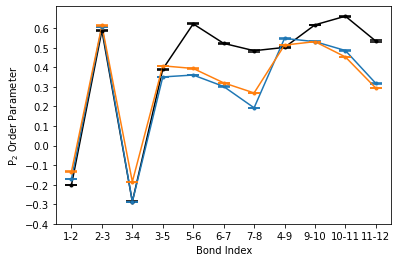

In [70]:
p2_c36_pope = np.loadtxt("pope/p2.dat")
p2_dev14_pope = np.loadtxt("pope/dev14/data/r1/p1/p2.dat")
p2_m3_pope = np.loadtxt("pope/m3/data/r1/p1/p2.dat")
bonds = ['1-2', '2-3', '3-4', '3-5', '5-6', '6-7', '7-8', '4-9', '9-10', '10-11', '11-12']

f, ax = plt.subplots()
markers, caps, bars = ax.errorbar(bonds,p2_c36_pope[:,0],p2_c36_pope[:,1],color='k',fmt='.',capsize=6,capthick=2,label='CG-AA C36')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_c36_pope[:,0],c='k')
markers, caps, bars = ax.errorbar(bonds,p2_dev14_pope[:,0],p2_dev14_pope[:,1],color='tab:blue',fmt='.',capsize=6,capthick=2,label='M3 v3.0.0')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_dev14_pope[:,0],c='tab:blue')
markers, caps, bars = ax.errorbar(bonds,p2_m3_pope[:,0],p2_m3_pope[:,1],color='tab:orange',fmt='.',capsize=6,capthick=2,label='M3 v3.0.0')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_m3_pope[:,0],c='tab:orange')

ax.set_yticks(np.arange(-0.4,0.7,0.1))
plt.xlabel("Bond Index")
plt.ylabel(r"P$_2$ Order Parameter")
plt.show()

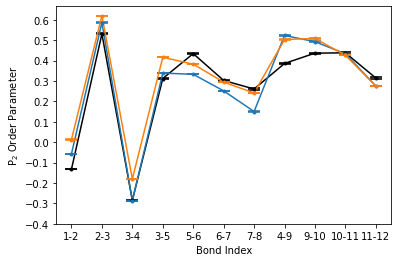

In [71]:
p2_c36_popg = np.loadtxt("popg/p2.dat")
p2_dev14_popg = np.loadtxt("popg/dev14/data/r1/p1/p2.dat")
p2_m3_popg = np.loadtxt("popg/m3/data/r1/p1/p2.dat")
bonds = ['1-2', '2-3', '3-4', '3-5', '5-6', '6-7', '7-8', '4-9', '9-10', '10-11', '11-12']

f, ax = plt.subplots()
markers, caps, bars = ax.errorbar(bonds,p2_c36_popg[:,0],p2_c36_popg[:,1],color='k',fmt='.',capsize=6,capthick=2,label='CG-AA C36')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_c36_popg[:,0],c='k')
markers, caps, bars = ax.errorbar(bonds,p2_dev14_popg[:,0],p2_dev14_popg[:,1],color='tab:blue',fmt='.',capsize=6,capthick=2,label='M3 v3.0.0')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_dev14_popg[:,0],c='tab:blue')
markers, caps, bars = ax.errorbar(bonds,p2_m3_popg[:,0],p2_m3_popg[:,1],color='tab:orange',fmt='.',capsize=6,capthick=2,label='M3 v3.0.0')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_m3_popg[:,0],c='tab:orange')

ax.set_yticks(np.arange(-0.4,0.7,0.1))
plt.xlabel("Bond Index")
plt.ylabel(r"P$_2$ Order Parameter")
plt.show()

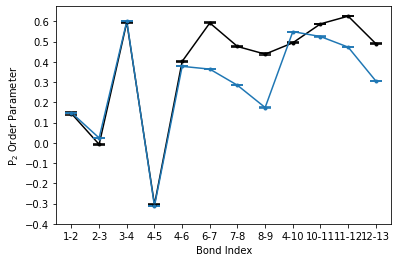

In [72]:
p2_c36_pops = np.loadtxt("pops/p2.dat")
p2_dev14_pops = np.loadtxt("pops/dev14/data/r1/p1/p2.dat")

bonds = ['1-2', '2-3', '3-4', '4-5', '4-6', '6-7', '7-8', '8-9', '4-10', '10-11', '11-12', '12-13']

f, ax = plt.subplots()
markers, caps, bars = ax.errorbar(bonds,p2_c36_pops[:,0],p2_c36_pops[:,1],color='k',fmt='.',capsize=6,capthick=2,label='CG-AA C36')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_c36_pops[:,0],c='k')
markers, caps, bars = ax.errorbar(bonds,p2_dev14_pops[:,0],p2_dev14_pops[:,1],color='tab:blue',fmt='.',capsize=6,capthick=2,label='M3 v3.0.0')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_dev14_pops[:,0],c='tab:blue')

ax.set_yticks(np.arange(-0.4,0.7,0.1))
plt.xlabel("Bond Index")
plt.ylabel(r"P$_2$ Order Parameter")
plt.show()

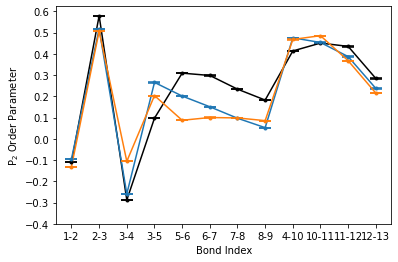

In [73]:
p2_c36_papc = np.loadtxt("papc/p2.dat")
p2_dev14_papc = np.loadtxt("papc/dev14/data/r1/p1/p2.dat")
p2_m3_papc = np.loadtxt("papc/m3/data/r1/p1/p2.dat")
bonds = ['1-2', '2-3', '3-4', '3-5', '5-6', '6-7', '7-8', '8-9', '4-10', '10-11', '11-12', '12-13']

f, ax = plt.subplots()
markers, caps, bars = ax.errorbar(bonds,p2_c36_papc[:,0],p2_c36_papc[:,1],color='k',fmt='.',capsize=6,capthick=2,label='CG-AA C36')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_c36_papc[:,0],c='k')
markers, caps, bars = ax.errorbar(bonds,p2_dev14_papc[:,0],p2_dev14_papc[:,1],color='tab:blue',fmt='.',capsize=6,capthick=2,label='M3 v3.0.0')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_dev14_papc[:,0],c='tab:blue')
markers, caps, bars = ax.errorbar(bonds,p2_m3_papc[:,0],p2_m3_papc[:,1],color='tab:orange',fmt='.',capsize=6,capthick=2,label='M3 v3.0.0')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_m3_papc[:,0],c='tab:orange')

ax.set_yticks(np.arange(-0.4,0.7,0.1))
plt.xlabel("Bond Index")
plt.ylabel(r"P$_2$ Order Parameter")
plt.show()

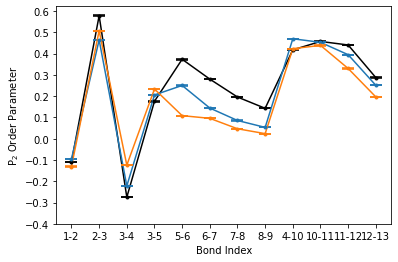

In [74]:
p2_c36_pdpc = np.loadtxt("pdpc/p2.dat")
p2_dev14_pdpc = np.loadtxt("pdpc/dev14/data/r1/p1/p2.dat")
p2_m3_pdpc = np.loadtxt("pdpc/m3/data/r1/p1/p2.dat")
bonds = ['1-2', '2-3', '3-4', '3-5', '5-6', '6-7', '7-8', '8-9', '4-10', '10-11', '11-12', '12-13']

f, ax = plt.subplots()
markers, caps, bars = ax.errorbar(bonds,p2_c36_pdpc[:,0],p2_c36_pdpc[:,1],color='k',fmt='.',capsize=6,capthick=2,label='CG-AA C36')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_c36_pdpc[:,0],c='k')
markers, caps, bars = ax.errorbar(bonds,p2_dev14_pdpc[:,0],p2_dev14_pdpc[:,1],color='tab:blue',fmt='.',capsize=6,capthick=2,label='M3 v3.0.0')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_dev14_pdpc[:,0],c='tab:blue')
markers, caps, bars = ax.errorbar(bonds,p2_m3_pdpc[:,0],p2_m3_pdpc[:,1],color='tab:orange',fmt='.',capsize=6,capthick=2,label='M3 v3.0.0')
[bar.set_alpha(0.8) for bar in bars]
[cap.set_alpha(0.8) for cap in caps]
ax.plot(bonds,p2_m3_pdpc[:,0],c='tab:orange')

ax.set_yticks(np.arange(-0.4,0.7,0.1))
plt.xlabel("Bond Index")
plt.ylabel(r"P$_2$ Order Parameter")
plt.show()